In [ ]:
## Input format
##,id,score,survival_months,vital_status
##0,TCGA-02-0003,0.37547094,4.731106,1.0
##1,TCGA-02-0004,0.10523935,11.334941,1.0
##2,TCGA-02-0006,-0.15777968,18.333035,1.0
##3,TCGA-02-0007,-0.3767121,23.162704,1.0
##4,TCGA-02-0009,0.5751036,10.579278,1.0
##5,TCGA-02-0010,-0.4037575,35.384727,1.0

In [28]:
install.packages('survminer', dependencies=TRUE)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘maptools’, ‘lme4’, ‘bdsmatrix’, ‘corrplot’, ‘car’, ‘bbmle’, ‘fastGHQuad’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘exactRankTests’, ‘KMsurv’, ‘km.ci’, ‘gridtext’, ‘deSolve’, ‘mstate’, ‘muhaz’, ‘rstpm2’, ‘ggpubr’, ‘maxstat’, ‘broom’, ‘survMisc’, ‘ggtext’, ‘flexsurv’, ‘cmprsk’





The downloaded binary packages are in
	/var/folders/b1/bm95rn417_x4zvzqffdd2n_w0000gn/T//RtmpcZc4o2/downloaded_packages


In [66]:
suppressMessages(library(survcomp))
suppressMessages(library(data.table))
suppressMessages(library(matlab))
suppressMessages(library(survAUC))
suppressMessages(library(Hmisc))
suppressMessages(library(survival))
suppressMessages(library(ggplot2))
suppressMessages(library(dplyr))
suppressMessages(library(ggfortify))
suppressMessages(library(survminer))

In [31]:
wd <- '/Users/sandrasteyaert/Stanford/multimodal_brain/TCGA_brain/'
setwd(wd)

## Define functions

In [10]:
calc_brier <- function (train_time, train_status, train_score, val_time, val_status, val_score, method ){
    data.tr <- data.frame("time"=train_time, "event"=train_status, "score"=train_score)
    data.ts <- data.frame("time"=val_time, "event"=val_status, "score"=val_score)
    ibs <- sbrier.score2proba(data.tr, data.ts, method = method)
    print(ibs$bsc.integrated)
    return (ibs$bsc.integrated)
}

In [36]:
plot_function2_adult <- function (df_val){
    df_val$group<-"low_risk"
    df_val$group[df_val$score>=median(df_val$score)]<-"high_risk"
    fit <- survfit(Surv(survival_months, vital_status) ~ group, data=df_val)
    ggsurvplot(
       fit,                     # survfit object with calculated statistics.
       data = df_val,  # data used to fit survival curves. 
       risk.table = TRUE,       # show risk table.
       pval = TRUE,             # show p-value of log-rank test.
       conf.int = TRUE,         # show confidence intervals for 
                            # point estimaes of survival curves.
       censor.size = 8,
       xlim = c(0,100),        # present narrower X axis, but not affect
       font.main = c(20, "plain", "black"),
       font.x = c(20, "plain", "black"), 
       font.y = c(20, "plain", "black"),
       font.tickslab = c(20, "plain", "black"),
       font.legend = c(20,
  "plain", "black"), # survival estimates.
       break.time.by = 10,     # break X axis in time intervals by 500.
       ggtheme = theme_minimal(),
        # customize plot and risk table with a theme.
       risk.table.y.text.col = T, # colour risk table text annotations.
       risk.table.y.text = FALSE # show bars instead of names in text annotations
                            # in legend of risk table
    )
    
}

## Pathology FFPE - single

In [55]:
# Read in data
train_df <- read.csv('WSI_FFPE/model_dict_best.pt_pathology_train_df.csv')
val_df <- read.csv('WSI_FFPE/model_dict_best.pt_pathology_val_df.csv')
#train_df <- read.csv('WSI_FFPE/model_last.pt_pathology_train_df.csv')
#val_df <- read.csv('WSI_FFPE/model_last.pt_pathology_val_df.csv')

In [56]:
briers <- rep(0,2)
i <- 1
for (method in c("cox", "prodlim")){
    print(method)
    brier <- calc_brier(train_df$survival_months, train_df$vital_status, train_df$score, val_df$survival_months,val_df$vital_status, val_df$score, method )
    briers[i] <- brier
    i <- i+1
}
print("mean BS: ")
print(mean(briers))

[1] "cox"
[1] 0.1249775
[1] "prodlim"
[1] 0.1660593
[1] "mean BS: "
[1] 0.1455184


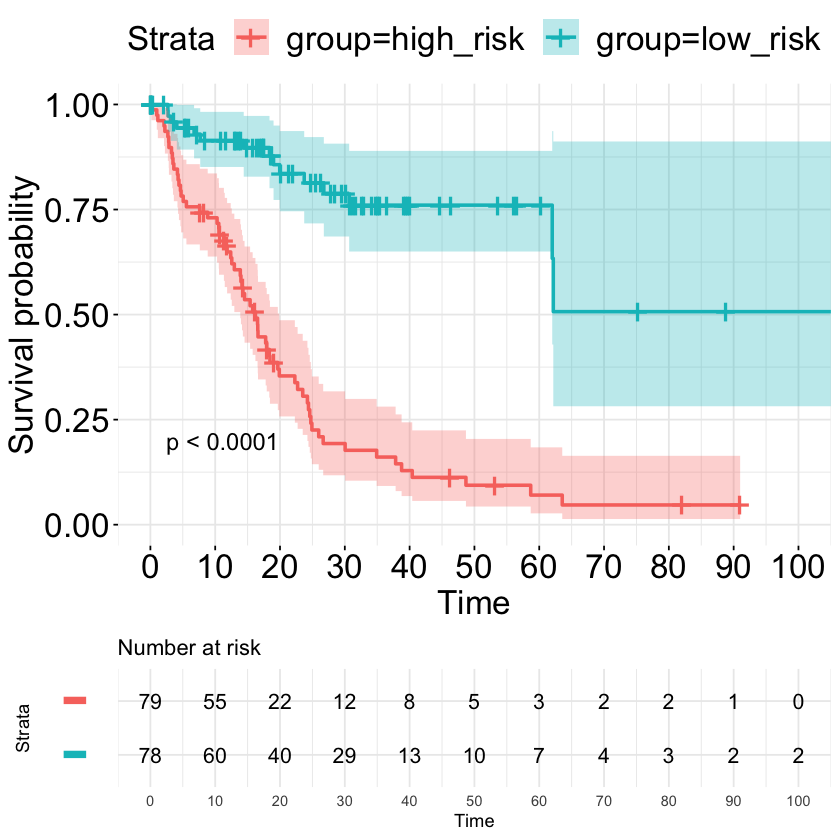

In [37]:
plot_function2_adult(val_df)

## Genomic RNA - single

In [39]:
train_df <- read.csv('RNAseq/model.pt_rna_train_df.csv')
val_df <- read.csv('RNAseq/model.pt_rna_val_df.csv')

In [40]:
briers <- rep(0,2)
i <- 1
for (method in c("cox", "prodlim")){
    print(method)
    brier <- calc_brier(train_df$survival_months, train_df$vital_status, train_df$score, val_df$survival_months,val_df$vital_status, val_df$score, method )
    briers[i] <- brier
    i <- i+1
}
print("mean BS: ")
print(mean(briers))

[1] "cox"
[1] 0.1042073
[1] "prodlim"
[1] 0.1226506
[1] "mean BS: "
[1] 0.113429


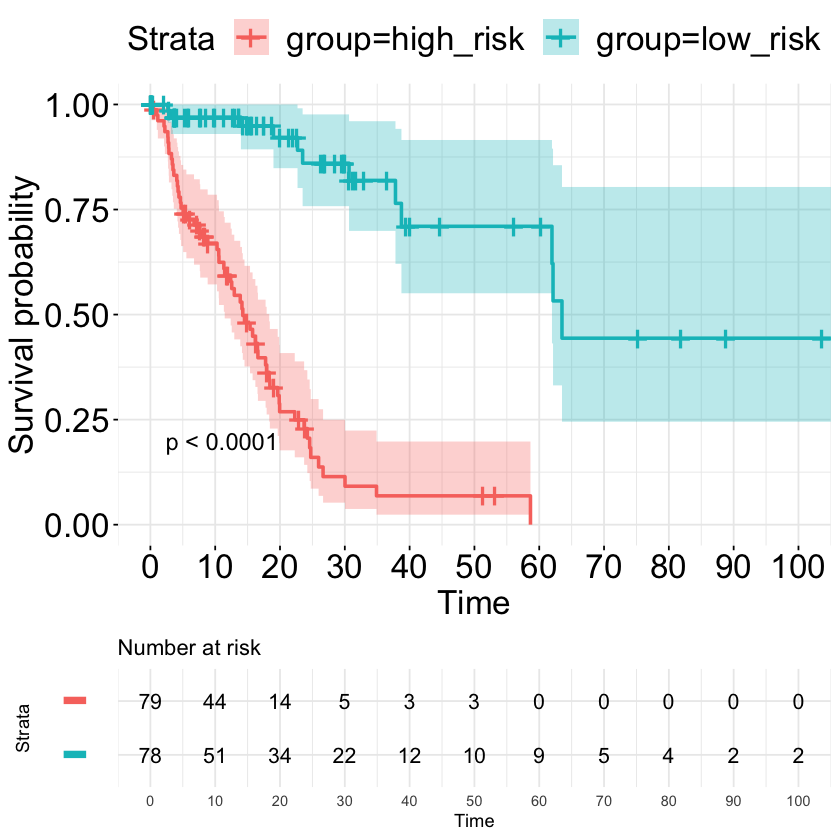

In [41]:
plot_function2_adult(val_df)

## Early fusion - multi

In [57]:
train_df <- read.csv('early/model_best_dict_best.pt_feature_train_df.csv')
val_df <- read.csv('early/model_best_dict_best.pt_feature_val_df.csv')
#train_df <- read.csv('early/model_dict.pt_feature_train_df.csv')
#val_df <- read.csv('early/model_dict.pt_feature_val_df.csv')

In [58]:
briers <- rep(0,2)
i <- 1
for (method in c("cox", "prodlim")){
    print(method)
    brier <- calc_brier(train_df$survival_months, train_df$vital_status, train_df$score, val_df$survival_months,val_df$vital_status, val_df$score, method )
    briers[i] <- brier
    i <- i+1
}
print("mean BS: ")
print(mean(briers))

[1] "cox"
[1] 0.09714608
[1] "prodlim"
[1] 0.1306909
[1] "mean BS: "
[1] 0.1139185


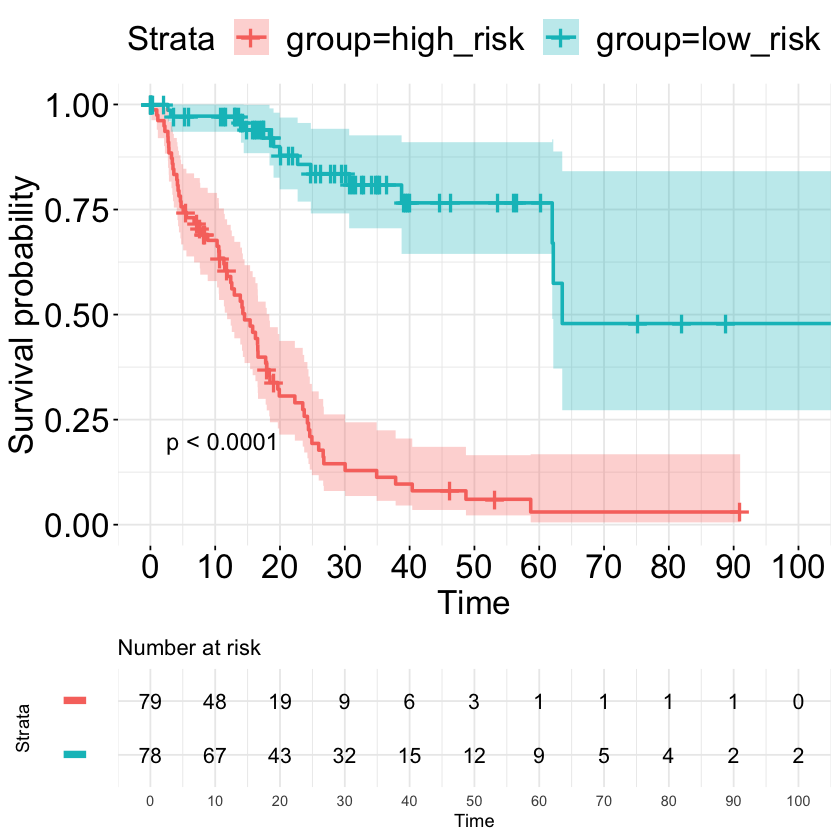

In [59]:
plot_function2_adult(val_df)

## Joint fusion - multi

In [63]:
train_df <- read.csv('joint/model_dict_best.pt_joint_train_df.csv')
val_df <- read.csv('joint/model_dict_best.pt_joint_val_df.csv')
#train_df <- read.csv('joint/model_last.pt_joint_train_df.csv')
#val_df <- read.csv('joint/model_last.pt_joint_val_df.csv')

## best and last are the same here

In [64]:
briers <- rep(0,2)
i <- 1
for (method in c("cox", "prodlim")){
    print(method)
    brier <- calc_brier(train_df$survival_months, train_df$vital_status, train_df$score, val_df$survival_months,val_df$vital_status, val_df$score, method )
    briers[i] <- brier
    i <- i+1
}
print("mean BS: ")
print(mean(briers))

[1] "cox"
[1] 0.1491341
[1] "prodlim"
[1] 0.14708
[1] "mean BS: "
[1] 0.148107


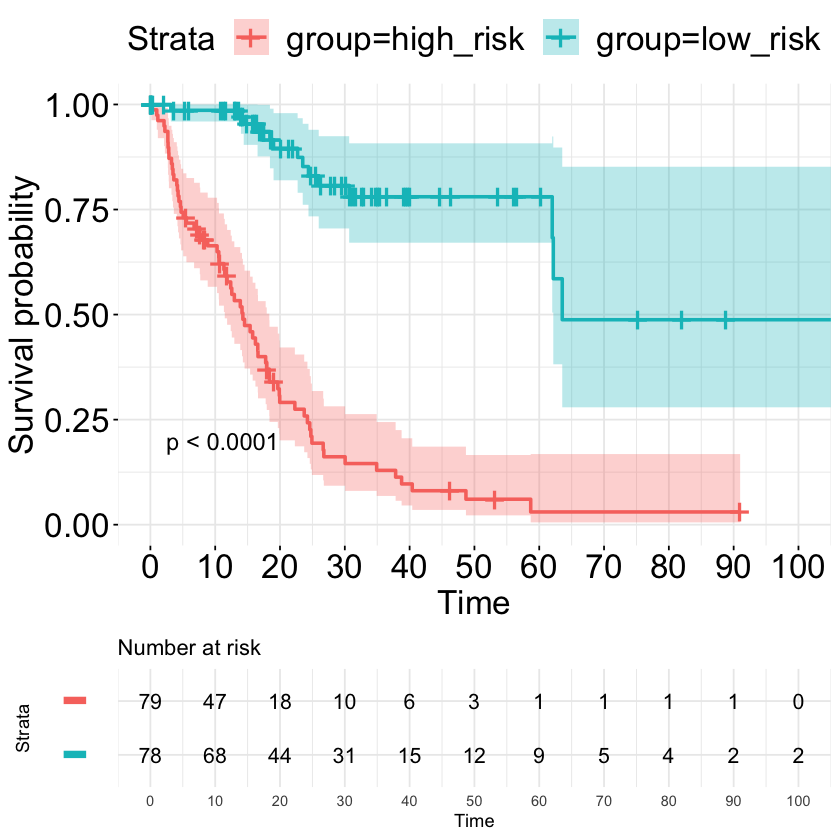

In [65]:
plot_function2_adult(val_df)

## Late fusion - multi

In [45]:
#train_df <- read.csv('late/model.pt_late_train_df.csv')
#val_df <- read.csv('late/model.pt_late_val_df.csv')
train_df <- read.csv('late/model_last.pt_late_train_df.csv')
val_df <- read.csv('late/model_last.pt_late_val_df.csv')

In [46]:
briers <- rep(0,2)
i <- 1
for (method in c("cox", "prodlim")){
    print(method)
    brier <- calc_brier(train_df$survival_months, train_df$vital_status, train_df$score, val_df$survival_months,val_df$vital_status, val_df$score, method )
    briers[i] <- brier
    i <- i+1
}
print("mean BS: ")
print(mean(briers))

[1] "cox"
[1] 0.09996761
[1] "prodlim"
[1] 0.1648735
[1] "mean BS: "
[1] 0.1324205


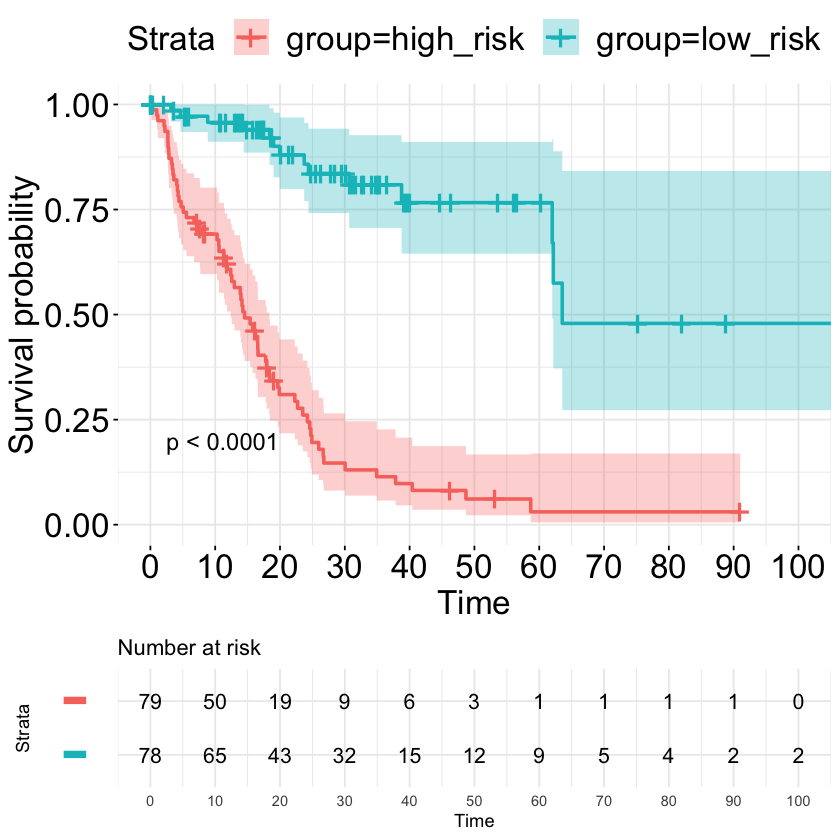

In [47]:
plot_function2_adult(val_df)